In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.preprocessing import image
import cv2
import tensorflow as tf
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import re
import random

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.preprocessing import image

In [4]:
data_directory = r"C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification"

Image path: C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification\green-glass\green-glass563.jpg


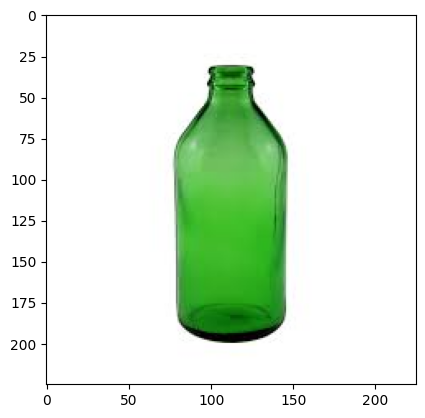

In [5]:
subfolders = os.listdir(data_directory)
random_subfolder = random.choice(subfolders)
subfolder_path = os.path.join(data_directory, random_subfolder)

random_file = random.choice(os.listdir(subfolder_path))

image_path = os.path.join(subfolder_path, random_file)
random_image = image.load_img(image_path)
print('Image path:', image_path)
plt.imshow(random_image)
plt.show()


In [9]:
garbage_types_labels = {
    'battery': 'battery',
    'biological': 'biological',
    'brown-glass': 'brown-glass',
    'cardboard': 'cardboard',
    'clothes': 'clothes',
    'green-glass': 'green-glass',
    'metal': 'metal',
    'paper': 'paper',
    'plastic': 'plastic',
    'shoes': 'shoes',
    'trash': 'trash',
    'white-glass': 'white-glass'
}


Hereby we are going to create a dataframe with with each photo:
- We create a list (filenames_list) with all the filenames in the dataset.
- We create a list to store the corresponding category (categories_list). To take into account that each folder of the dataset has one class of data
- We do a for loop with all the files on the folders to loop each element of the dictionary with all our garbage types. The loop obtains the name slist of each file and store them in (filenames). The same for categories (categories_list) storages the list of categories as much of times that the categories is present in the files.
- Then, we create the df wit two columns 'Image'and'Garbage_category'.
- Finally, we create a fx (def file_rename) to create a prefix to each file. This will help us in the next steps to model and analyse each file.

In [10]:
# list containing all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for item in garbage_types_labels:
    filenames = os.listdir(data_directory + "/" + str(garbage_types_labels[item]))
    
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [item] * len(filenames)
    
df = pd.DataFrame({
    'Image': filenames_list,
    'Category': categories_list
})
df

,Image,Category
0,battery1.jpg,battery
1,battery10.jpg,battery
2,battery100.jpg,battery
3,battery101.jpg,battery
4,battery102.jpg,battery
...,...,...
15510,white-glass95.jpg,white-glass
15511,white-glass96.jpg,white-glass
15512,white-glass97.jpg,white-glass
15513,white-glass98.jpg,white-glass


In [11]:
def file_rename(df, col_name):
    df[col_name] = df[col_name].astype(str).apply(lambda x: x[:re.search("\d", str(x)).start()] + '/' + str(x))
    return df


In [12]:
df=file_rename(df, 'Image')
df['Image'][0]

'battery/battery1.jpg'

In [13]:
df['Image'] = df['Image'].apply(lambda x: data_directory + '/' + x)

In [16]:
df

,Image,Category
0,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/battery/battery1.jpg,battery
1,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/battery/battery10.jpg,battery
2,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/battery/battery100.jpg,battery
3,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/battery/battery101.jpg,battery
4,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/battery/battery102.jpg,battery
...,...,...
15510,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/white-glass/white-glass95.jpg,white-glass
15511,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/white-glass/white-glass96.jpg,white-glass
15512,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/white-glass/white-glass97.jpg,white-glass
15513,C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification/white-glass/white-glass98.jpg,white-glass


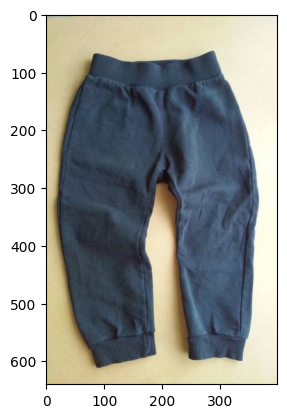

In [17]:
random_row = random.randint(0, len(df) - 1)
sample = df.iloc[random_row]
image_path = os.path.join(data_directory, sample['Image'])
random_image = image.load_img(image_path)
plt.imshow(random_image)
plt.show()

In [18]:
duplicates_exist = df.duplicated().any()
print(duplicates_exist)

False


In [19]:
nulls=df.isnull().any()
print(nulls)

Image       False
Category    False
dtype: bool


In [20]:
#def split_data(df, ratio):
    #train_data, test_data = train_test_split(df, test_size=(1 - ratio), shuffle=True)
    #return train_data, test_data

In [14]:
#train_data, test_data = split_data(df, 0.8)

In [15]:
#train_data

,Image,Category
9387,metal/metal103.jpg,metal
14094,trash/trash145.jpg,trash
3178,cardboard/cardboard677.jpg,cardboard
12752,shoes/shoes1616.jpg,shoes
6894,clothes/clothes4118.jpg,clothes
...,...,...
12927,shoes/shoes1774.jpg,shoes
13075,shoes/shoes1907.jpg,shoes
9267,green-glass/green-glass562.jpg,green-glass
12051,plastic/plastic865.jpg,plastic


In [16]:
train_data["Category"].value_counts()

Category
clothes        4255
shoes          1568
paper           828
biological      783
battery         769
plastic         708
cardboard       707
metal           629
white-glass     610
trash           548
green-glass     507
brown-glass     500
Name: count, dtype: int64

In [17]:
test_data["Category"].value_counts()

Category
clothes        1070
shoes           409
paper           222
biological      202
cardboard       184
battery         176
white-glass     165
plastic         157
trash           149
metal           140
green-glass     122
brown-glass     107
Name: count, dtype: int64

In [18]:
test_data

,Image,Category
5604,clothes/clothes2958.jpg,clothes
7650,clothes/clothes48.jpg,clothes
1105,biological/biological243.jpg,biological
5763,clothes/clothes310.jpg,clothes
4498,clothes/clothes1962.jpg,clothes
...,...,...
3986,clothes/clothes1500.jpg,clothes
5558,clothes/clothes2916.jpg,clothes
932,battery/battery939.jpg,battery
5088,clothes/clothes2493.jpg,clothes


In [21]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

len(train_df), len(val_df), len(test_df)

(12412, 1551, 1552)

In [22]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv',index=False)
val_df.to_csv('validation.csv',index=False)

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0

num_classes=12

# Definir parámetros de la red
img_height = 224
img_width = 224
batch_size = 32
epochs = 10

# Crear generadores de imágenes para el preprocesamiento y aumento de datos
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
# Generar datos de entrenamiento y prueba utilizando los generadores de imágenes
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image',
    y_col='Category',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 9930 validated image filenames belonging to 12 classes.


In [45]:
print(train_df.head())

                        Image   Category
0     clothes/clothes2288.jpg    clothes
1      clothes/clothes954.jpg    clothes
2  cardboard/cardboard846.jpg  cardboard
3      plastic/plastic487.jpg    plastic
4          shoes/shoes551.jpg      shoes


In [ ]:

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Image',
    y_col='Category',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image',
    y_col='Category',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Cargar el modelo EfficientNetB0 preentrenado en ImageNet
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Agregar capas adicionales al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Definir el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Evaluar el modelo en el conjunto de prueba
model.evaluate(test_generator)



In [43]:
print("Número de muestras de entrenamiento:", len(train_df))

Número de muestras de entrenamiento: 12412


In [ ]:
print("Número de muestras de entrenamiento:", len(train_generator))
print("Número de muestras de validación:", len(validation_generator))


In [42]:
n_classes=12


In [43]:
from keras.utils import np_utils
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (12412,)
Shape after one-hot encoding:  (12412, 12)


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


# Definir el modelo
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(12, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.001))

Y_train = to_categorical(y_train, num_classes=12)
Y_test = to_categorical(y_test, num_classes=12)

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
97/97 [==============================] - 6s 52ms/step - loss: 1.9859 - accuracy: 0.3862 - val_loss: 1.6741 - val_accuracy: 0.4615
Epoch 2/20
97/97 [==============================] - 5s 55ms/step - loss: 1.5776 - accuracy: 0.4779 - val_loss: 1.5254 - val_accuracy: 0.4853
Epoch 3/20
97/97 [==============================] - 7s 71ms/step - loss: 1.4275 - accuracy: 0.5287 - val_loss: 1.4228 - val_accuracy: 0.5414
Epoch 4/20
97/97 [==============================] - 7s 70ms/step - loss: 1.3205 - accuracy: 0.5679 - val_loss: 1.3589 - val_accuracy: 0.5611
Epoch 5/20
97/97 [==============================] - 6s 67ms/step - loss: 1.2523 - accuracy: 0.5880 - val_loss: 1.3259 - val_accuracy: 0.5620
Epoch 6/20
97/97 [==============================] - 7s 71ms/step - loss: 1.1892 - accuracy: 0.6080 - val_loss: 1.2988 - val_accuracy: 0.5691
Epoch 7/20
97/97 [==============================] - 6s 67ms/step - loss: 1.1433 - accuracy: 0.6287 - val_loss: 1.2741 - val_accuracy: 0.5814
Epoch 8/20
97

In [50]:
import cv2

# Redimensionar las imágenes a 32x32
X_train_resized = []
X_test_resized = []

for img in X_train:
    resized_img = cv2.resize(img, (32, 32))
    X_train_resized.append(resized_img)

for img in X_test:
    resized_img = cv2.resize(img, (32, 32))
    X_test_resized.append(resized_img)

X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)


In [51]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Cargar el modelo pre-entrenado de MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Agregar nuevas capas al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_resized, Y_train, batch_size=128, epochs=10, validation_data=(X_test_resized, Y_test))


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10


ValueError: in user code:

    File "C:\Users\DataLeticia\miniconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DataLeticia\miniconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DataLeticia\miniconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DataLeticia\miniconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\DataLeticia\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DataLeticia\miniconda3\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model' (type Functional).
    
    Input 0 of layer "Conv1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 32, 32)
    
    Call arguments received by layer 'model' (type Functional):
      • inputs=tf.Tensor(shape=(None, 32, 32), dtype=float32)
      • training=True
      • mask=None


In [71]:
model.save("model_pre_98")

INFO:tensorflow:Assets written to: model_pre_98\assets


INFO:tensorflow:Assets written to: model_pre_98\assets


In [72]:
!ls

6M-0K-99K.users.dataset.public.csv
DataCoSupplyChainDataset.csv
IMG-8644.jpg
ML_classification-Copy1.ipynb
ML_classification.ipynb
Supply2.xlsx
archive (31).zip
archive (37).zip
garbage_classification
model_pre_98
num5.jpg
project.ipynb
supply_chain_data.csv
test.csv
train.csv
what_if_first_in_article.png


In [66]:
# Evaluation of the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print("Loss on the test set:", loss)
print("Accurancy on the test set:", accuracy)


313/313 [==============================] - 4s 12ms/step - loss: 0.0630 - accuracy: 0.9847
Loss on the test set: 0.0630066990852356
Accurancy on the test set: 0.9847000241279602


In [67]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [68]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9847


In [69]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)


Confusion Matrix:
[[ 972    0    2    0    1    0    1    1    3    0]
 [   1 1123    5    1    0    0    2    1    2    0]
 [   1    2 1013    1    1    0    0    5    9    0]
 [   0    0    2  995    0    6    0    3    4    0]
 [   0    0    2    0  971    0    2    0    0    7]
 [   1    0    1    6    0  880    3    0    1    0]
 [   5    2    3    0    1    1  944    0    2    0]
 [   0    1   12    0    0    0    0 1009    5    1]
 [   3    0    2    0    1    0    1    4  961    2]
 [   2    3    0    5    9    3    0    3    5  979]]


In [75]:
import numpy as np
from PIL import Image

image_path = r"C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\IMG-8644.jpg"
image = Image.open(image_path).convert('L')  # Convertir a escala de grises si es necesario
image = image.resize((28, 28))  # Redimensionar a 28x28 píxeles si es necesario
image = np.array(image)
image = image.reshape(1, 28, 28, 1)  # Agregar dimensión adicional para el batch

# Normalizar la imagen
image = image.astype('float32')
image /= 255

# Realizar la predicción
predictions = model.predict(image)

# Obtener la clase con mayor probabilidad
predicted_class = np.argmax(predictions)

print("La imagen es:", predicted_class)


1/1 [==============================] - 0s 74ms/step
La imagen es: 2
